# 学習方法の例

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from common.layers import TwoLayerNet
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD
#from common.layers import Convolution, MaxPooling, ReLU, Affine, SoftmaxWithLoss
#from common.util import im2col, col2im
from sklearn.model_selection import train_test_split
import pickle

## データを読む1

In [60]:
train_data = np.load("../1_data/train_data.npy")
train_label = np.load("../1_data/train_label.npy")
print("train_data.shape=", train_data.shape)
print("train_label.shape=", train_label.shape)

train_data.shape= (3000, 1, 28, 28)
train_label.shape= (3000, 15)


In [61]:
# 正規化
train_data = (train_data - train_data.min()) / train_data.max()
train_data = train_data.astype('float32')
#print(train_data)

In [62]:
# 配列形式変更
train_data = train_data.reshape(-1, 28*28)
print("train_data.shape=", train_data.shape)

train_data.shape= (3000, 784)


## trainとtestに分割する

In [54]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, 
                                                                                        test_size=0.3, random_state=1234,
                                                                                        shuffle=True
                                                                                       )

print(X_train.shape, X_test.shape)

(2100, 784) (900, 784)


## 学習

In [55]:
epochs = 5000
batch_size = 32
lr = 0.001

def run(optimizer):
    # 繰り返し回数
    xsize = X_train.shape[0]
    iter_num = np.ceil(xsize / batch_size).astype(np.int)

    # 2層NNのオブジェクト生成
    tnet = TwoLayerNet(input_size=28*28, hidden_size=10, output_size=15)

    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    for epoch in range(epochs):
    
        # シャッフル
        idx = np.arange(xsize)
        np.random.shuffle(idx)

        for it in range(iter_num):
            """
            ランダムなミニバッチを順番に取り出す
            """
            mask = idx[batch_size*it : batch_size*(it+1)]
    
            # ミニバッチの生成
            x_ = X_train[mask]
            y_ = y_train[mask]
        
            # 勾配の計算
            grads = tnet.gradient(x_, y_)

            # パラメータの更新
            optimizer.update(tnet.params, grads)

        ## 学習経過の記録
    
        # 訓練データにおけるloss
        train_loss.append(tnet.loss(X_train,  y_train))
     
        # テストデータにおけるloss
        test_loss.append(tnet.loss(X_test, y_test))
    
        # 訓練データにて精度を確認
        train_accuracy.append(tnet.accuracy(X_train, y_train))

        # テストデータにて精度を算出
    test_accuracy.append(tnet.accuracy(X_test, y_test))

In [56]:
optimizer = SGD(lr=0.01)
run(optimizer)

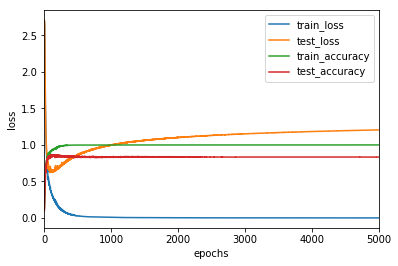

In [57]:
## lossのグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss,
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
df_log.plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

## 学習済みモデルの出力

In [58]:
with open("katakana_model.pickle", "wb") as f:
    pickle.dump(tnet, f)